In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score



In [27]:
ruta= "C:/Users/DANI/Downloads/MALL CUSTOMERS FILE/Mall_Customers.csv"

In [29]:
datos = pd.read_csv(ruta)

In [31]:
print (datos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [33]:
print("Dimensiones del dataset:", datos.shape)
print("\nPrimeras 3 filas:")
print(datos.head(3))

Dimensiones del dataset: (200, 5)

Primeras 3 filas:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6


In [35]:
datos_limpios = datos.drop('CustomerID', axis=1)


In [37]:
print("Nuevas columnas:", datos_limpios.columns.tolist())

Nuevas columnas: ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']


In [37]:
print("Nuevas columnas:", datos_limpios.columns.tolist())

Nuevas columnas: ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']


In [39]:
print("Valores faltantes por columna:")
print(datos_limpios.isnull().sum())

Valores faltantes por columna:
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [41]:
print("Número de filas con datos duplicadas:", datos_limpios.duplicated().sum())

Número de filas con datos duplicadas: 0


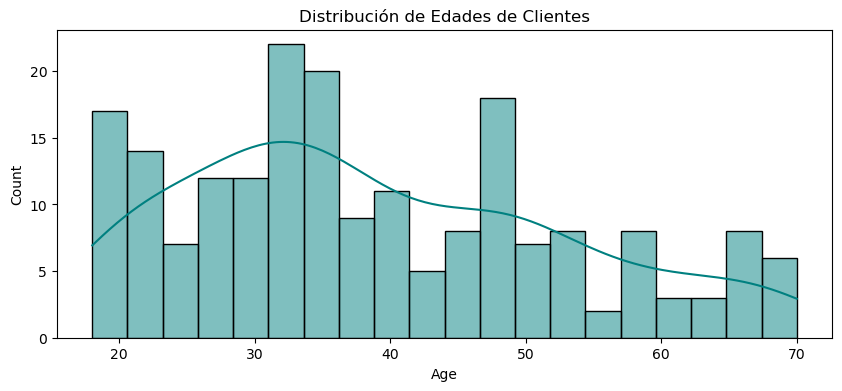

In [43]:
plt.figure(figsize=(10, 4))
sns.histplot(data=datos_limpios, x='Age', bins=20, kde=True, color='teal')
plt.title("Distribución de Edades de Clientes")
plt.show()

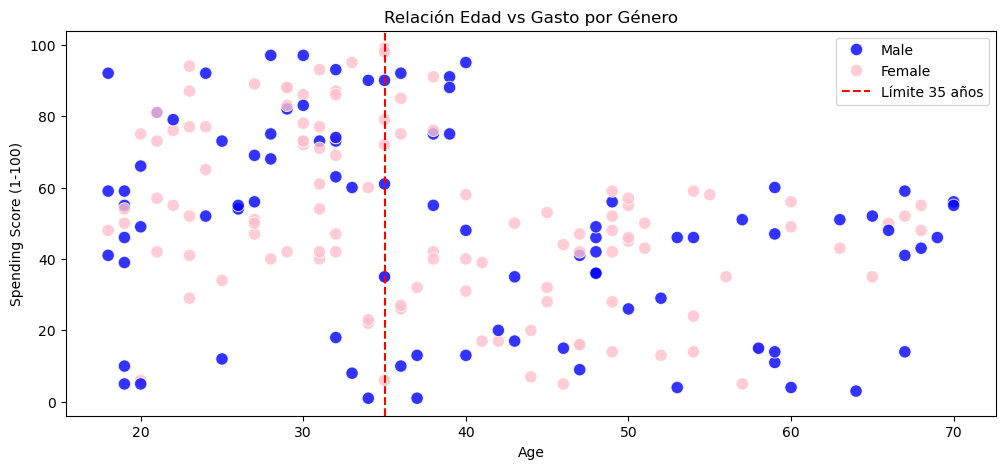

In [45]:
plt.figure(figsize=(12, 5))
sns.scatterplot(data=datos_limpios, x='Age', y='Spending Score (1-100)', 
                hue='Gender', palette=['blue', 'pink'], s=80, alpha=0.8)
plt.title("Relación Edad vs Gasto por Género")
plt.axvline(x=35, color='red', linestyle='--', label='Límite 35 años')  # Resaltar el rango
plt.legend()
plt.show()

In [47]:
stats = datos_limpios.groupby('Gender')['Spending Score (1-100)'].agg(['mean', 'std', 'count'])
print(stats.round(1))

        mean   std  count
Gender                   
Female  51.5  24.1    112
Male    48.5  27.9     88


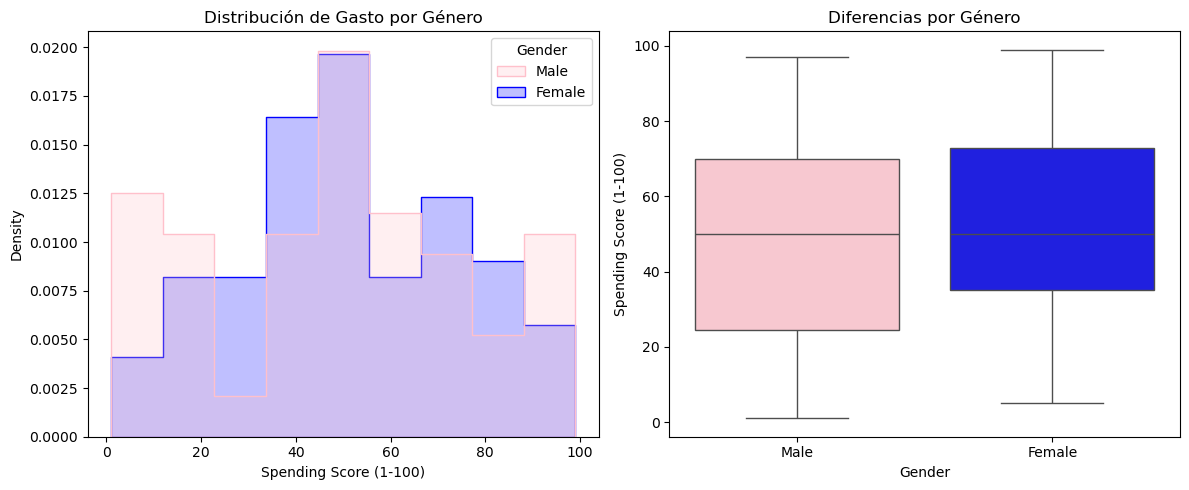

In [49]:
plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
sns.histplot(data=datos_limpios, x='Spending Score (1-100)', hue='Gender', 
             element='step', stat='density', common_norm=False, palette=['pink', 'blue'])
plt.title('Distribución de Gasto por Género')


plt.subplot(1, 2, 2)
sns.boxplot(data=datos_limpios, x='Gender', y='Spending Score (1-100)', 
            hue='Gender', palette=['pink', 'blue'], legend=False)  # <- Cambio clave
plt.title('Diferencias por Género')

plt.tight_layout()
plt.show()

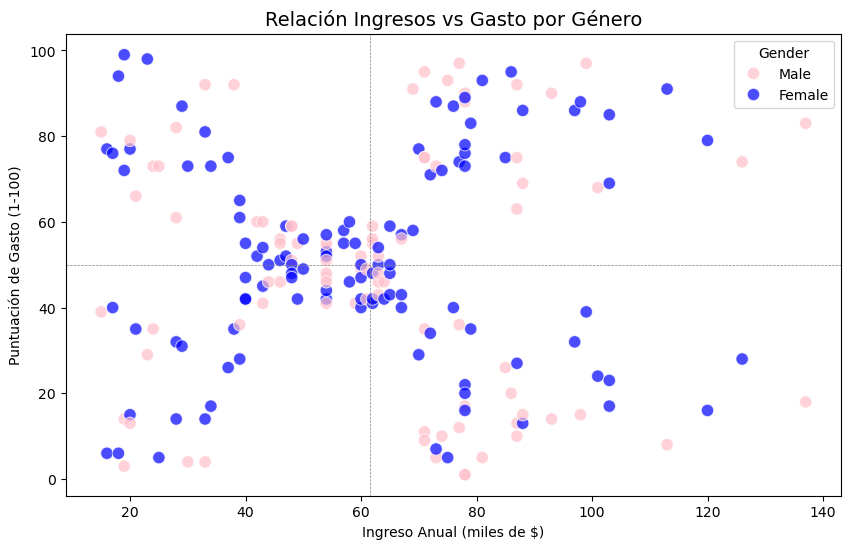

In [51]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=datos_limpios, 
    x='Annual Income (k$)', 
    y='Spending Score (1-100)', 
    hue='Gender', 
    palette=['pink', 'blue'], 
    alpha=0.7,
    s=80
)
plt.title('Relación Ingresos vs Gasto por Género', fontsize=14)
plt.xlabel('Ingreso Anual (miles de $)')
plt.ylabel('Puntuación de Gasto (1-100)')
plt.axhline(y=50, color='gray', linestyle='--', linewidth=0.5)  # Línea de gasto promedio
plt.axvline(x=datos_limpios['Annual Income (k$)'].median(), color='gray', linestyle='--', linewidth=0.5)  # Línea de ingreso mediano
plt.show()

In [53]:
['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Age_Group', 'Income_Group']

['Gender',
 'Age',
 'Annual Income (k$)',
 'Spending Score (1-100)',
 'Age_Group',
 'Income_Group']

In [55]:
# Reemplazar 'Female' por 1 y 'Male' por 0
datos_limpios['Gender'] = datos_limpios['Gender'].map({'Female': 1, 'Male': 0})


In [57]:
# Verificar el cambio
print("\nValores únicos en 'Gender':", datos_limpios['Gender'].unique())
print("\nPrimeras 5 filas:")
print(datos_limpios[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']].head())


Valores únicos en 'Gender': [0 1]

Primeras 5 filas:
   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0       0   19                  15                      39
1       0   21                  15                      81
2       1   20                  16                       6
3       1   23                  16                      77
4       1   31                  17                      40


In [59]:
from sklearn.preprocessing import StandardScaler

# Seleccionar variables numéricas
X = datos_limpios[['Annual Income (k$)', 'Spending Score (1-100)', 'Age', 'Gender']]  # Incluimos Gender (0 y 1)

# Escalar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Verificar (media ~0 y desviación ~1)
print("Media de cada variable escalada:", X_scaled.mean(axis=0).round(2))
print("Desviación estándar:", X_scaled.std(axis=0).round(2))

Media de cada variable escalada: [-0. -0. -0. -0.]
Desviación estándar: [1. 1. 1. 1.]


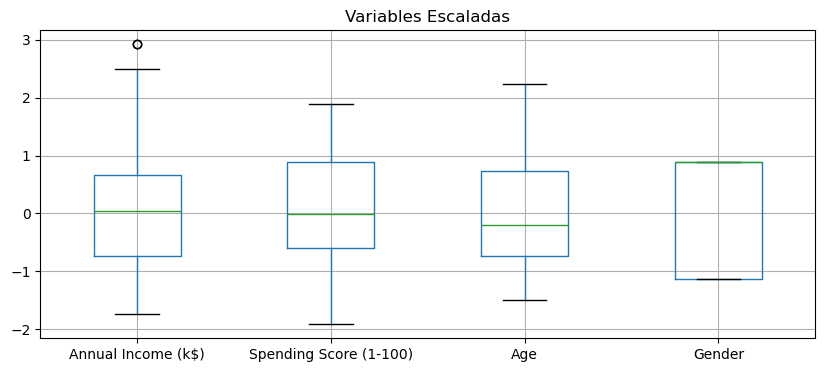

In [61]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.boxplot(figsize=(10, 4))
plt.title("Variables Escaladas")
plt.show()

C:\Users\DANI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DANI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DANI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DANI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

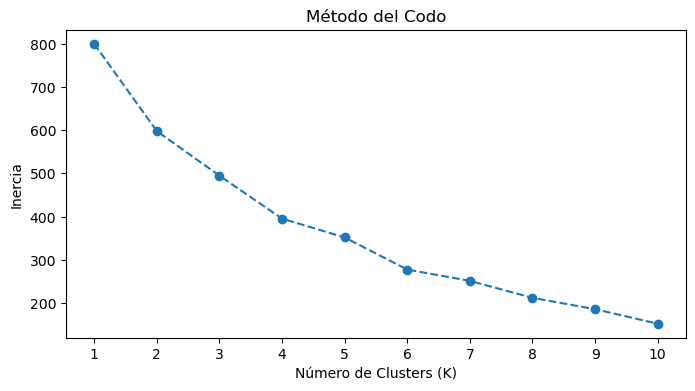

In [63]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Graficar
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.xticks(range(1, 11))
plt.show()

In [65]:
import os
os.environ['OMP_NUM_THREADS'] = '1'  
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
datos_limpios['Cluster'] = kmeans.fit_predict(X_scaled)

# Ver conteo de clusters
print(datos_limpios['Cluster'].value_counts())

Cluster
0    112
1     88
Name: count, dtype: int64


C:\Users\DANI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [69]:
# Estadísticas por cluster
print(datos_limpios.groupby('Cluster').mean().round(1))

         Gender   Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                          
0           1.0  38.1                59.2                    51.5
1           0.0  39.8                62.2                    48.5


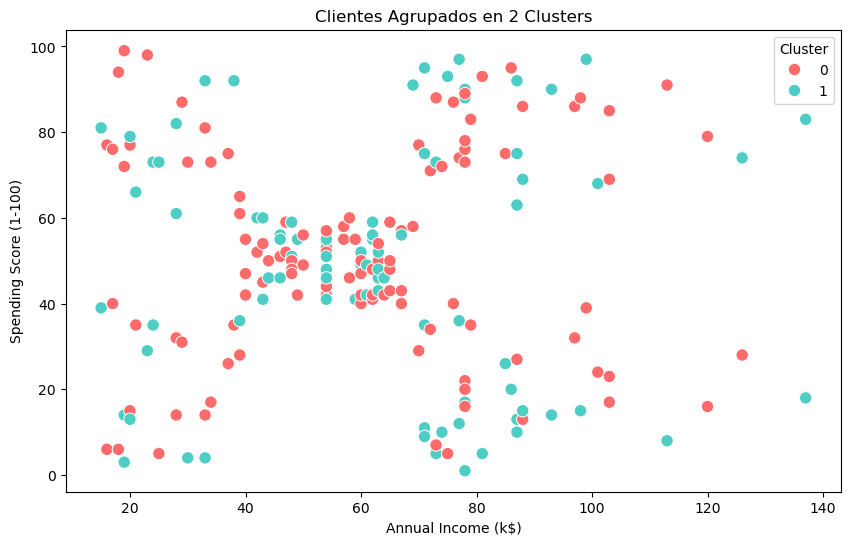

In [71]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=datos_limpios,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette=['#FF6B6B', '#4ECDC4'],
    s=80
)
plt.title('Clientes Agrupados en 2 Clusters')
plt.show()

In [19]:
from sklearn.preprocessing import StandardScaler


In [21]:
from sklearn.preprocessing import StandardScaler


C:\Users\DANI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DANI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DANI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DANI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

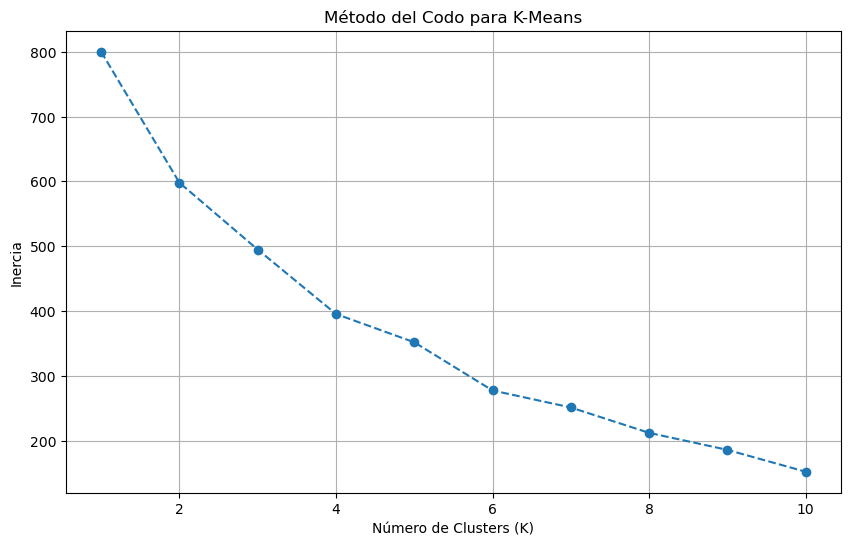

In [73]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inercia')
plt.title('Método del Codo para K-Means')
plt.grid()
plt.show()



Resultados para K=2
Inercia: 597.95
Calinski-Harabasz Index: 66.91
Davies-Bouldin Index: 1.61


C:\Users\DANI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


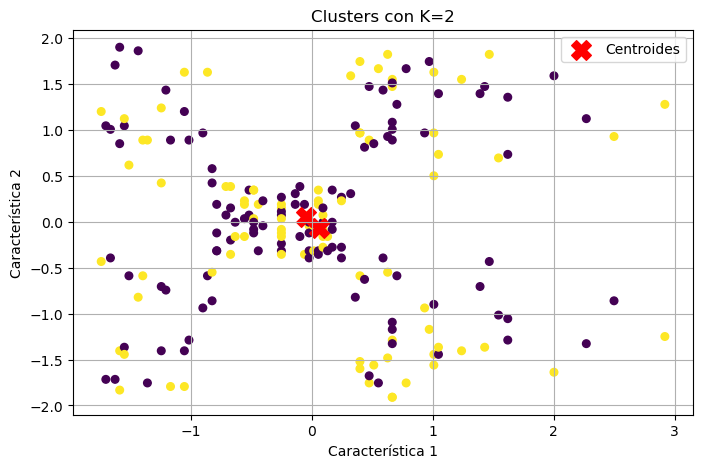


Resultados para K=6
Inercia: 277.39
Calinski-Harabasz Index: 73.10
Davies-Bouldin Index: 1.01


C:\Users\DANI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


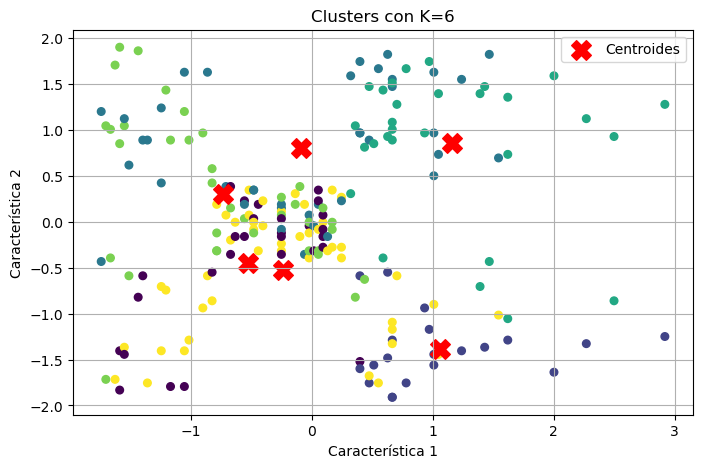

In [75]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Suponiendo que X_scaled ya está definido
for k in [2, 6]:
    print(f"\nResultados para K={k}")
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)

    inertia = kmeans.inertia_
    ch_score = calinski_harabasz_score(X_scaled, labels)
    db_score = davies_bouldin_score(X_scaled, labels)

    print(f"Inercia: {inertia:.2f}")
    print(f"Calinski-Harabasz Index: {ch_score:.2f}")
    print(f"Davies-Bouldin Index: {db_score:.2f}")

    # Scatter Plot
    plt.figure(figsize=(8, 5))
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=30)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                c='red', marker='X', s=200, label='Centroides')
    plt.title(f'Clusters con K={k}')
    plt.xlabel('Característica 1')
    plt.ylabel('Característica 2')
    plt.legend()
    plt.grid()
    plt.show()


In [81]:
  print("Nuevas columnas:", datos_limpios.columns.tolist())

Nuevas columnas: ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']


In [85]:
import pandas as pd

# Definir la ruta del archivo CSV
ruta = "C:/Users/DANI/Downloads/MALL CUSTOMERS FILE/Mall_Customers.csv"

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv(ruta)

# Verificar las primeras filas del DataFrame para asegurarse de que se cargó correctamente
print(df.head())

# Verificar las columnas del DataFrame
print(df.columns)


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [89]:
print(df.columns)


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')



Resultados para K=2
Inercia: 389.39
Calinski-Harabasz Index: 107.10
Davies-Bouldin Index: 1.26


C:\Users\DANI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


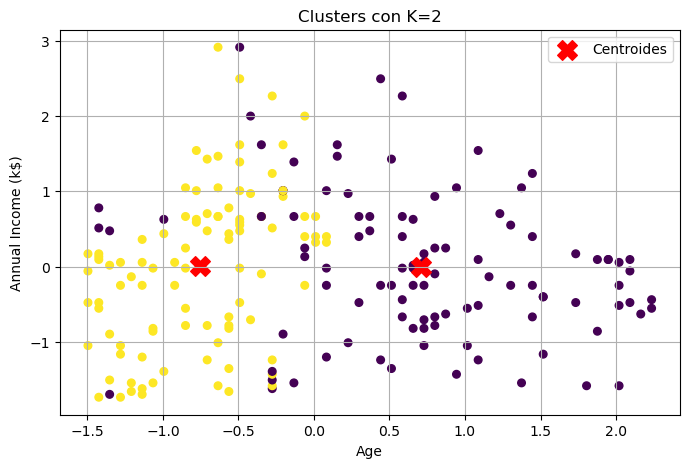


Resultados para K=6
Inercia: 134.35
Calinski-Harabasz Index: 134.48
Davies-Bouldin Index: 0.83


C:\Users\DANI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


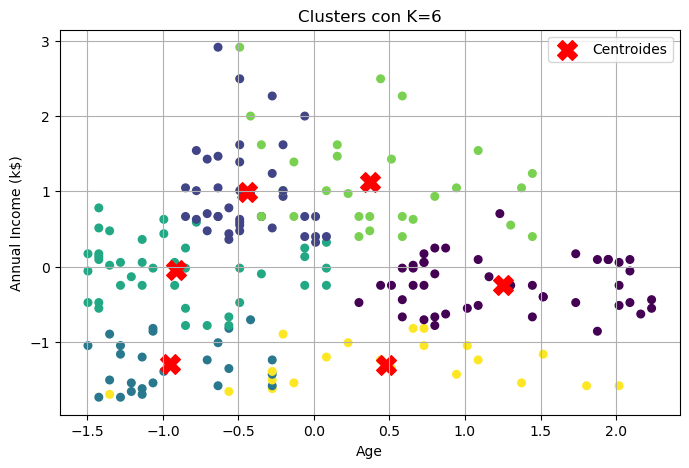

In [97]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

feature_names = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Suponiendo que X_scaled ya está definido
for k in [2, 6]:
    print(f"\nResultados para K={k}")
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)

    inertia = kmeans.inertia_
    ch_score = calinski_harabasz_score(X_scaled, labels)
    db_score = davies_bouldin_score(X_scaled, labels)

    print(f"Inercia: {inertia:.2f}")
    print(f"Calinski-Harabasz Index: {ch_score:.2f}")
    print(f"Davies-Bouldin Index: {db_score:.2f}")

    # Scatter Plot con etiquetas de variables reales
    plt.figure(figsize=(8, 5))
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=30)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                c='red', marker='X', s=200, label='Centroides')
    plt.title(f'Clusters con K={k}')
    plt.xlabel(feature_names[0])  # 'Age'
    plt.ylabel(feature_names[1])  # 'Annual Income (k$)'
    plt.legend()
    plt.grid()
    plt.show()


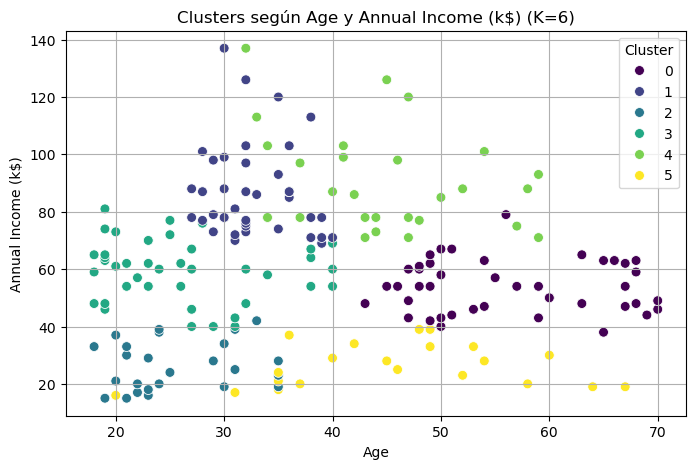

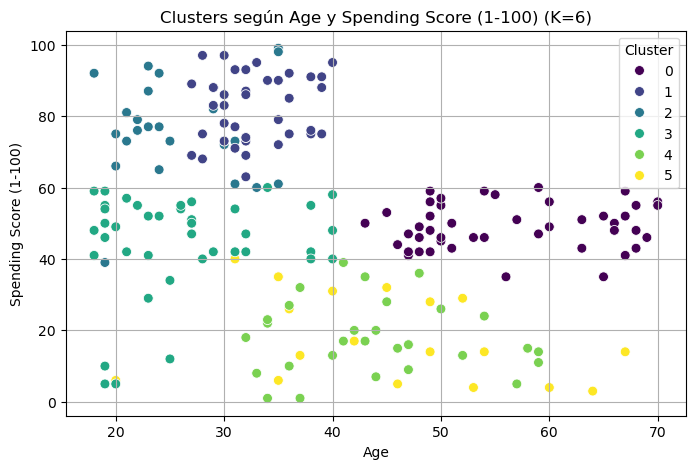

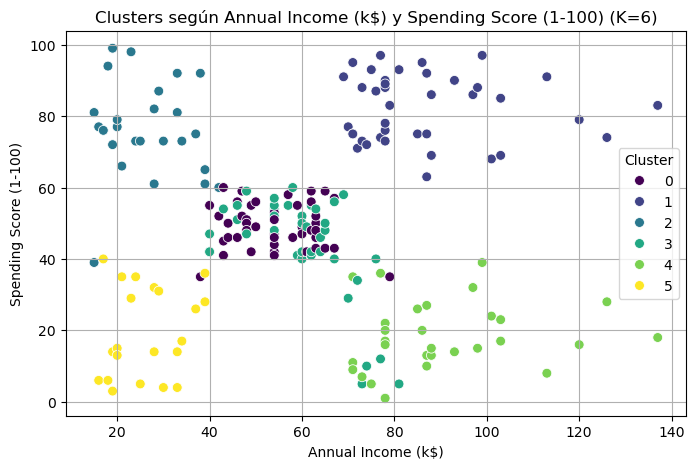

In [95]:
import matplotlib.pyplot as plt

# Suponiendo que df ya contiene las columnas originales y la asignación de clusters
df['Cluster'] = labels  # Asegúrate de que `labels` provenga del modelo K actual

# Define las combinaciones de variables a graficar
combinaciones = [
    ('Age', 'Annual Income (k$)'),
    ('Age', 'Spending Score (1-100)'),
    ('Annual Income (k$)', 'Spending Score (1-100)')
]

# Graficar
for x_col, y_col in combinaciones:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x=x_col, y=y_col, hue='Cluster', palette='viridis', s=50)
    plt.title(f'Clusters según {x_col} y {y_col} (K={k})')
    plt.legend(title='Cluster')
    plt.grid()
    plt.show()
